### Problem Statement
Extract and recognize the text (including handwritten text) from the sample cheque image.

##### Importing the relevent libraries

In [83]:
import os, io
from google.cloud import vision_v1
from google.cloud.vision_v1 import types
import cv2
import re
from PIL import ImageDraw
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,30)

##### Provide authentication credentials by setting the environment variable GOOGLE_APPLICATION_CREDENTIALS and create a client instance.

In [84]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'C:\Users\aslam\Documents\Python venv\ServiceAccountToken.json'
client = vision_v1.ImageAnnotatorClient()

In [14]:
folder_path = r'E:\Code\Projects\Google vision API for handwritten text'
file = 'sample_cheque.png'
file_path = os.path.join(folder_path, file)

##### Open the file as name image_file and store the binary information in content object. 'rb' is for read binary.

In [85]:
with io.open(file_path, 'rb') as image_file:
    content = image_file.read()

##### The response contains a AnnotateImageResponse, which is a json consisting of a list of Image Annotation results.
* __First is text_annotations which contains only word level information, i.e, words and their particular location coordinates.__
* __Another one is full_text_annotation which contains character level data descriptions. The full_text_annotation contains a structured representation of OCR extracted text which is like this : full_text_annotation -> Page -> Block -> Paragraph -> Word ->Symbols.__
    * __Group of symbols create words, group of words create a paragraph and so on. Each representation has properties like language and bounding_box.__
    * __You can use this type of representation to divide the text content and process them separately as you want.__
    * __Suppose you are extracting information from text documents with fixed format, using this representation will make your work easier.__

In [102]:
image = types.Image(content = content)
response = client.document_text_detection(image = image)
document = response.full_text_annotation
text = response.text_annotations

'NUTECH SECURITY PRINTERS CTS 2010\n16/03/2016\nTATE\nPAY\nरुपये RUPEES\nखा. सं.\nA/c No.\nभारतीय स्टेट बैंक\nState Bank Of India\nTATER\nTA\n(07556) SHIKAR\nSHIKAR, DISTT GURDASPUR\nPUNJAB-143506\nBr Tel:1871267777 Fax:1267777 IFS CODE: SBIN0007556\n35583310826\nPrateek Agrawal\nFifty Lakh Twenty Five Thousand Only\nअदा करें।\nSAVINGS A/C\nPREFIX :\n1516100013\nVALID UPTO 10 LACS AT NON-HOME BRANCH\nBebe\nकेवल 3 महीने के लिए वैध / VALID FOR 3 MONTHS ONLY\n05042019\nDDMMYYYY\nOFAN\nRANKOFINDIA STATEBA\nMULTI-CITY CHEQUE Payable at Par at All Branches of SBI FINDIA STATEBA\n230 270 143002341: 00405 2 31\nया धारक को OR BEARER\n50,25,000/-\nQualayk\nDEEPAK CHOUDHARY\nPlease sign above\nSTATE'

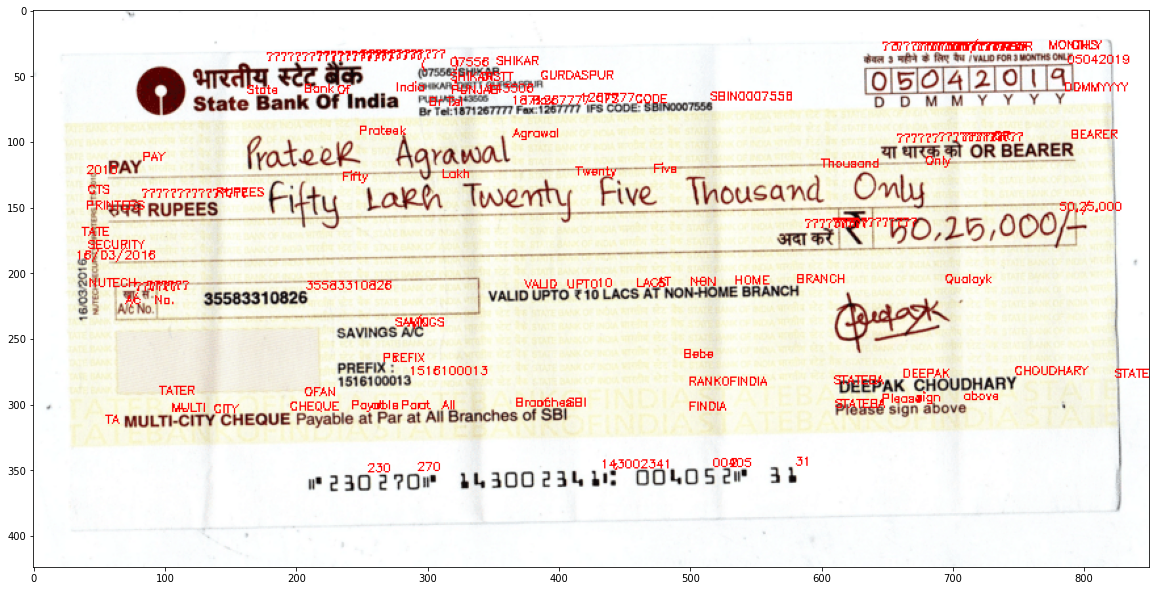

In [105]:

img = cv2.imread(file_path)
for i in range(1,len(text)):
    img = cv2.putText(img, text[i].description, ((text[i].bounding_poly.vertices[1].x),(text[i].bounding_poly.vertices[1].y)), cv2.FONT_HERSHEY_SIMPLEX,0.3,(255,0,0),1)
plt.rcParams["figure.figsize"] = (20,30)
plt.imshow(img)
document.text